In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import sys
sys.path.append("../")
from helpers.iaml01cw2_helpers import load_FashionMNIST

In [16]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("C:\\Users\\User\\Documents\\3. Third Year\\IAML\\INFR10069-2020-CW2\\data")

In [17]:
Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()

In [18]:
Xtrn = Xtrn/255.0
Xtst = Xtst/255.0

In [19]:
Xmean = Xtrn.mean(0)

In [20]:
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

In [21]:
Xtrn_nm[0, :4], Xtrn_nm[-1, :4]

(array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04]),
 array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04]))

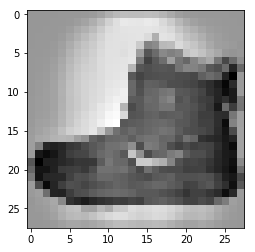

In [22]:
plt.imshow(Xtrn_nm[0].reshape((28, 28)), cmap='gray_r')

In [23]:
class_means = []
class_cf_samples = {i : None for i in range(10)}

for c in range(10):
    indices = np.where(Ytrn == c)[0]
    Xclass = np.take(Xtrn_nm, indices, 0)
    
    class_means.append(Xclass.mean(0))
    
    cdists = sorted(zip(indices ,np.apply_along_axis(lambda x: np.linalg.norm(x-class_means[c]), 1, Xclass)), key = lambda x: x[1])
    
    class_cf_samples[c] = [d[0] for d in cdists[:2] + cdists[-2:]]
    

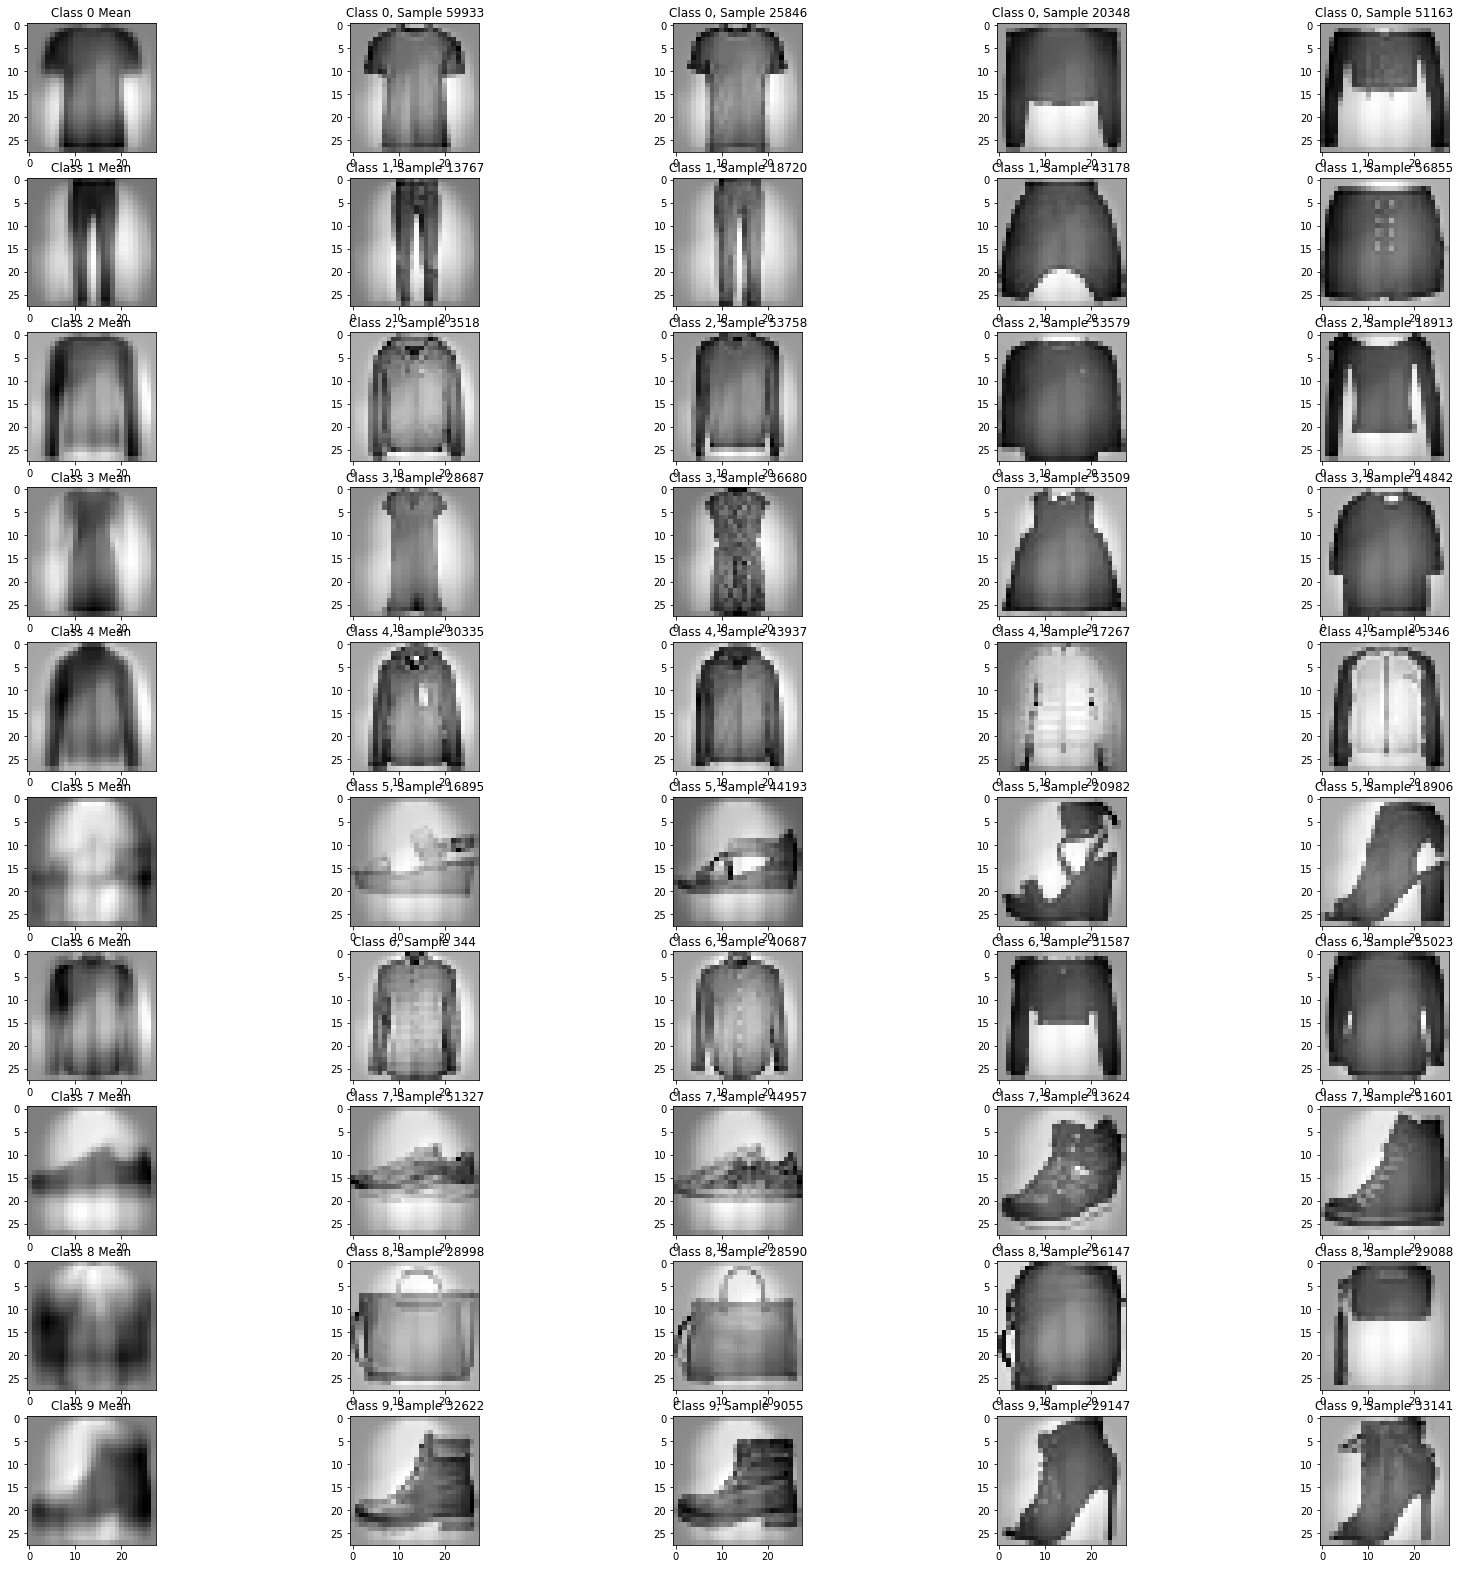

In [24]:
fig, ax = plt.subplots(nrows = 10, ncols = 5, figsize = (28, 28))

for row in range(10):
    for col in range(5):
        plt.sca(ax[row, col])
        
        if col == 0:
            plt.imshow(class_means[row].reshape((28, 28)), cmap = "gray_r")
            plt.title(f"Class {row} Mean")
        
        else:
            img = class_cf_samples[row][col-1]
            plt.imshow(Xtrn_nm[img].reshape(28, 28), cmap = "gray_r")
            plt.title(f"Class {row}, Sample {img}")